# Births and populations: Latin America and the Caribbean

In [41]:
import matplotlib, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("../../notebook.mplstyle")

os.makedirs("./output", exist_ok=True)

## Births

In [42]:
births_df = pd.read_csv("births.csv")
births_df

,year,lb_prev,lb_prev_ns,lb_ds,lb_ds_ns
0,1900,22.442514,22.442514,6603.223326,0.000000
1,1901,22.448382,22.448382,6772.097608,0.000000
2,1902,22.453984,22.453984,6940.976830,0.000000
3,1903,22.459338,22.459338,7109.860991,0.000000
4,1904,22.464460,22.464460,7278.750090,0.000000
...,...,...,...,...,...
116,2016,17.761571,18.020991,18360.898360,268.172668
117,2017,18.087034,18.346609,18614.661630,267.147432
118,2018,18.481483,18.747653,18830.968270,271.203203
119,2019,18.826504,19.091420,18768.448800,264.098775


[]

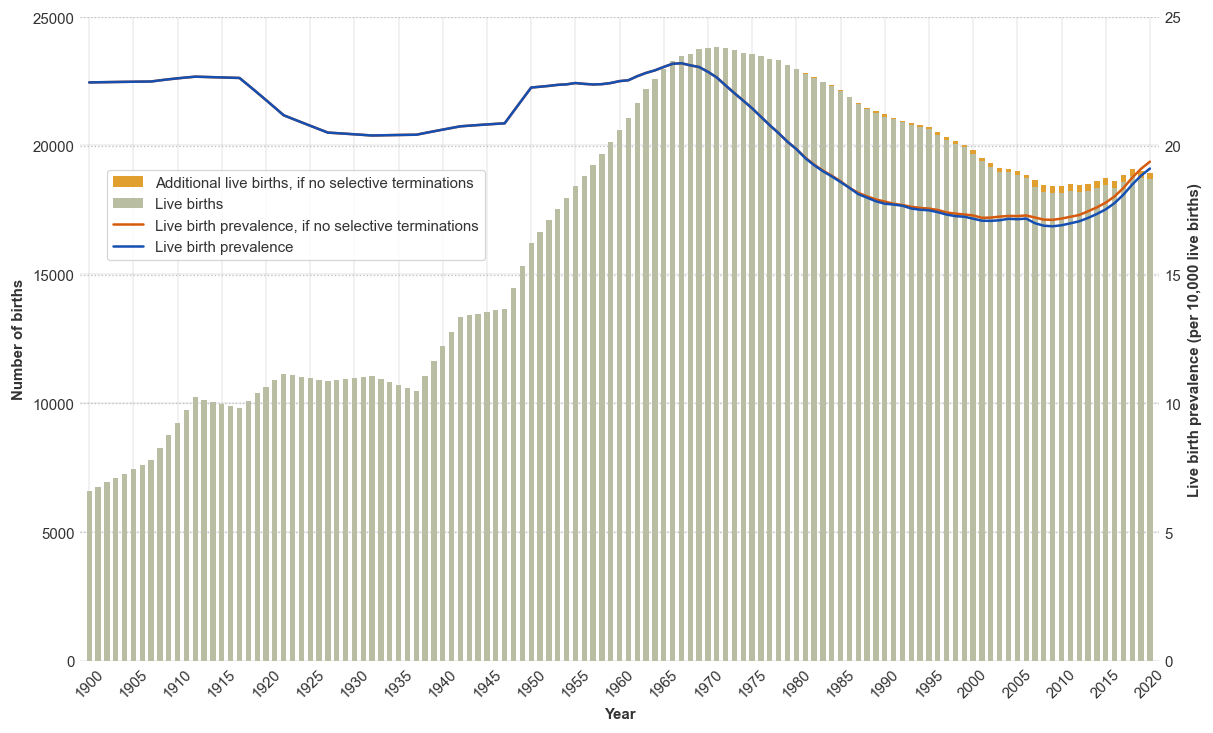

In [43]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(births_df['year'], births_df['lb_ds'] + births_df['lb_ds_ns'], color="#e09f2e", label='Additional live births, if no selective terminations', width=0.6)
ax1.bar(births_df['year'], births_df['lb_ds'],  color="#b9bea3", label='Live births', width=0.6)
ax1.set_ylabel('Number of births')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2.plot(births_df['year'], births_df['lb_prev_ns'], linestyle='-', color="#d65b0e", label='Live birth prevalence, if no selective terminations')
ax2.plot(births_df['year'], births_df['lb_prev'], linestyle='-', color="#154fb1", label='Live birth prevalence')
ax2.set_ylim(0, 25)
ax2.set_ylabel('Live birth prevalence (per 10,000 live births)')

for ax in (ax1, ax2):
    ax.spines["top"].set_visible(False)

ax1.set_axisbelow(True)  # so grid is behind bars/lines
ax1.yaxis.grid(True, which="major", linestyle=":", linewidth=0.8)

ax1.set_xlim(1899, 2021)
yticks = np.arange(1900, 2025, step=5)
ax1.set_xticks(yticks, labels=yticks, rotation=45)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

fig.legend(h1 + h2, l1 + l2, loc='center left', bbox_to_anchor=(0.077, 0.71))


plt.savefig("output/latin-america-figure-1.pdf", format='pdf')
plt.savefig("output/latin-america-births-1900-2020.svg", format='svg')
plt.savefig("output/latin-america-births-1900-2020.png", format='png', dpi=300)

plt.plot()

## Population

In [44]:
pop_df = pd.read_csv("population.csv").convert_dtypes()
pop_df

,year,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_39,age_40_49,age_50_59,age_60_plus,pop_prev,pop_prev_ns
0,1950,24622,9740,5413,4912,3445,2065,1722,585,314,16,3.13856,3.13856
1,1955,31359,21483,7415,4428,4347,3121,2271,674,324,83,3.93386,3.93386
2,1960,36655,27289,17771,6076,3915,3937,3416,725,346,127,4.562255,4.562255
3,1965,42725,31734,22542,14579,5354,3545,4512,935,400,145,5.016867,5.016869
4,1970,47323,36674,26301,18544,12863,4855,4589,1405,430,167,5.345134,5.345138
5,1975,49703,40650,30519,21701,16421,11675,5576,1910,556,191,5.538171,5.538183
6,1980,51219,42450,34054,25329,19279,14937,11792,2086,845,205,5.580364,5.580494
7,1985,52597,43573,36083,28540,22642,17631,18158,2719,1171,271,5.554572,5.557572
8,1990,57686,44741,39135,31696,26082,21174,24730,6144,1351,397,5.719755,5.728147
9,1995,65591,49514,42363,37654,30571,25272,35068,12767,1960,542,6.23257,6.245735


In [45]:
pop_df.dtypes

year             Int64
age_0_4          Int64
age_5_9          Int64
age_10_14        Int64
age_15_19        Int64
age_20_24        Int64
age_25_29        Int64
age_30_39        Int64
age_40_49        Int64
age_50_59        Int64
age_60_plus      Int64
pop_prev       Float64
pop_prev_ns    Float64
dtype: object

C:\Users\FrankBuckley\AppData\Local\Temp\ipykernel_77232\2627739889.py:46: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


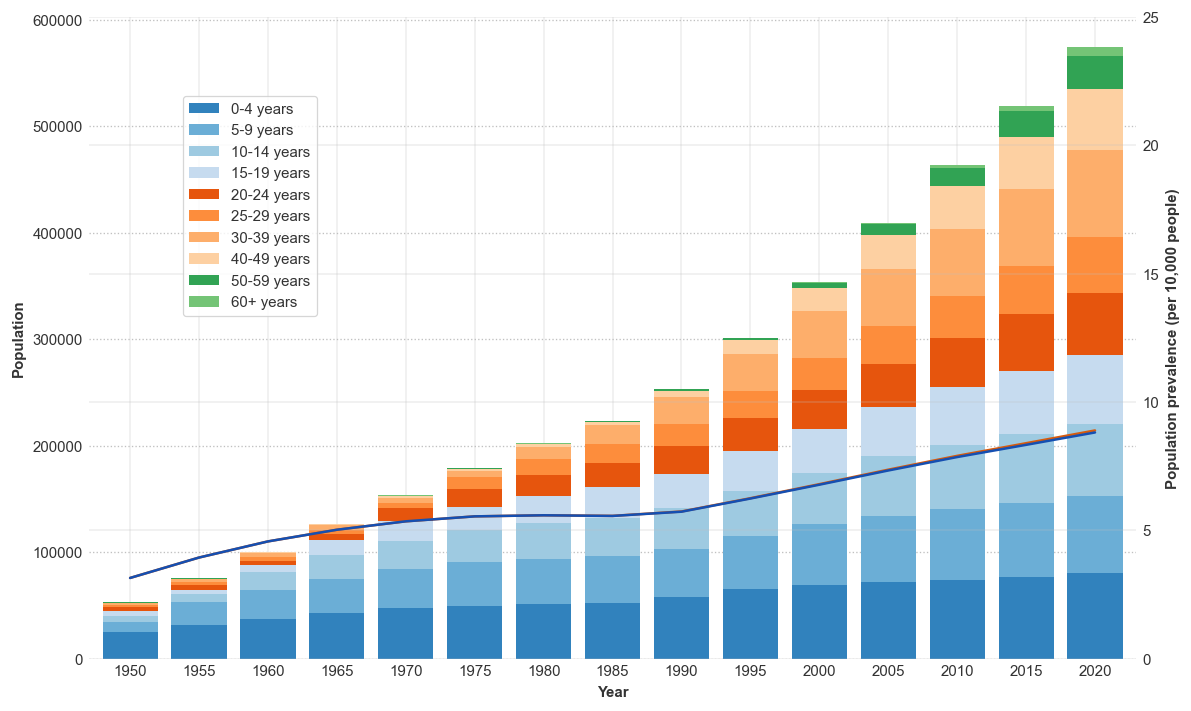

In [46]:
from cycler import cycler
fig, ax1 = plt.subplots(figsize=(10, 6))

stacked = (
    "age_0_4", "age_5_9", "age_10_14", "age_15_19", "age_20_24",
    "age_25_29", "age_30_39", "age_40_49", "age_50_59", "age_60_plus"
)

step = np.diff(pop_df["year"]).min()
bar_width = step * 0.8

bottom = np.zeros(len(pop_df))

ax1.set_prop_cycle(cycler(color=matplotlib.color_sequences["tab20c"]))

for col in stacked:
    ax1.bar(
        pop_df["year"],
        pop_df[col],
        bottom=bottom,
        width=bar_width,
        label=(col.replace("age_", "").replace("_", "-").replace("-plus", "+")) + " years")
    bottom += pop_df[col]   # update cumulative bottom

ax1.set_ylabel("Population")
ax1.set_xlabel("Year")

ax2 = ax1.twinx()
ax2.plot(pop_df['year'], pop_df['pop_prev_ns'], linestyle='-', color="#d65b0e")
ax2.plot(pop_df['year'], pop_df['pop_prev'], linestyle='-', color="#154fb1")
ax2.set_ylim(0, 25)
ax2.set_ylabel('Population prevalence (per 10,000 people)')

for ax in (ax1, ax2):
    ax.spines["top"].set_visible(False)

ax1.set_axisbelow(True)
ax1.yaxis.grid(True, which="major", linestyle=":", linewidth=0.8)

ax1.set_xlim(1947, 2023)

xticks = np.arange(1950, 2025, step=5)
ax1.set_xticks(xticks, labels=xticks)

fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.87))
fig.tight_layout()

plt.savefig("output/latin-america-figure-2.pdf", format='pdf')
plt.savefig("output/latin-america-population-1950-2020.svg", format='svg')
plt.savefig("output/latin-america-population-1900-2020.png", format='png', dpi=300)

plt.show()
